<a href="https://colab.research.google.com/github/UrumeseJoy/ml-projects/blob/main/Predictive_Maintenance_Naval_Vessel_Condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the data set

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
df.shape

(11934, 19)

In [ ]:
df.isnull().sum()

,0
index,0
Lever position,0
Ship speed (v),0
Gas Turbine (GT) shaft torque (GTT) [kN m],0
GT rate of revolutions (GTn) [rpm],0
Gas Generator rate of revolutions (GGn) [rpm],0
Starboard Propeller Torque (Ts) [kN],0
Port Propeller Torque (Tp) [kN],0
Hight Pressure (HP) Turbine exit temperature (T48) [C],0
GT Compressor inlet air temperature (T1) [C],0


In [ ]:
df.columns.tolist()


['index',
 'Lever position ',
 'Ship speed (v) ',
 'Gas Turbine (GT) shaft torque (GTT) [kN m]\xa0 ',
 'GT rate of revolutions (GTn) [rpm]\xa0 ',
 'Gas Generator rate of revolutions (GGn) [rpm]\xa0 ',
 'Starboard Propeller Torque (Ts) [kN]\xa0 ',
 'Port Propeller Torque (Tp) [kN]\xa0 ',
 'Hight Pressure (HP) Turbine exit temperature (T48) [C]\xa0 ',
 'GT Compressor inlet air temperature (T1) [C]\xa0 ',
 'GT Compressor outlet air temperature (T2) [C]\xa0 ',
 'HP Turbine exit pressure (P48) [bar]\xa0 ',
 'GT Compressor inlet air pressure (P1) [bar]\xa0 ',
 'GT Compressor outlet air pressure (P2) [bar]\xa0 ',
 'GT exhaust gas pressure (Pexh) [bar]\xa0 ',
 'Turbine Injecton Control (TIC) [%]\xa0 ',
 'Fuel flow (mf) [kg/s]\xa0 ',
 'GT Compressor decay state coefficient\xa0 ',
 'GT Turbine decay state coefficient ']

In [ ]:
df.columns = [col.strip().replace('\xa0', '') for col in df.columns]
df.columns.tolist()  # Show cleaned column names


['index',
 'Lever position',
 'Ship speed (v)',
 'Gas Turbine (GT) shaft torque (GTT) [kN m]',
 'GT rate of revolutions (GTn) [rpm]',
 'Gas Generator rate of revolutions (GGn) [rpm]',
 'Starboard Propeller Torque (Ts) [kN]',
 'Port Propeller Torque (Tp) [kN]',
 'Hight Pressure (HP) Turbine exit temperature (T48) [C]',
 'GT Compressor inlet air temperature (T1) [C]',
 'GT Compressor outlet air temperature (T2) [C]',
 'HP Turbine exit pressure (P48) [bar]',
 'GT Compressor inlet air pressure (P1) [bar]',
 'GT Compressor outlet air pressure (P2) [bar]',
 'GT exhaust gas pressure (Pexh) [bar]',
 'Turbine Injecton Control (TIC) [%]',
 'Fuel flow (mf) [kg/s]',
 'GT Compressor decay state coefficient',
 'GT Turbine decay state coefficient']

In [ ]:
# Drop the index column
df = df.drop('index', axis=1)

# Features (all columns except the last two)
X = df.iloc[:, :-2]

# Targets (the last two columns)
y = df[['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']]

X.shape, y.shape


((11934, 16), (11934, 2))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9547, 16), (2387, 16), (9547, 2), (2387, 2))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Compressor
mse_compressor = mean_squared_error(y_test.iloc[:, 0], y_pred[:, 0])
r2_compressor = r2_score(y_test.iloc[:, 0], y_pred[:, 0])

# Turbine
mse_turbine = mean_squared_error(y_test.iloc[:, 1], y_pred[:, 1])
r2_turbine = r2_score(y_test.iloc[:, 1], y_pred[:, 1])

print("Compressor - MSE:", mse_compressor, "R2:", r2_compressor)
print("Turbine    - MSE:", mse_turbine, "R2:", r2_turbine)


Compressor - MSE: 7.469726434854822e-07 R2: 0.9965252595612786
Turbine    - MSE: 4.2106870548800894e-07 R2: 0.9926107183055849


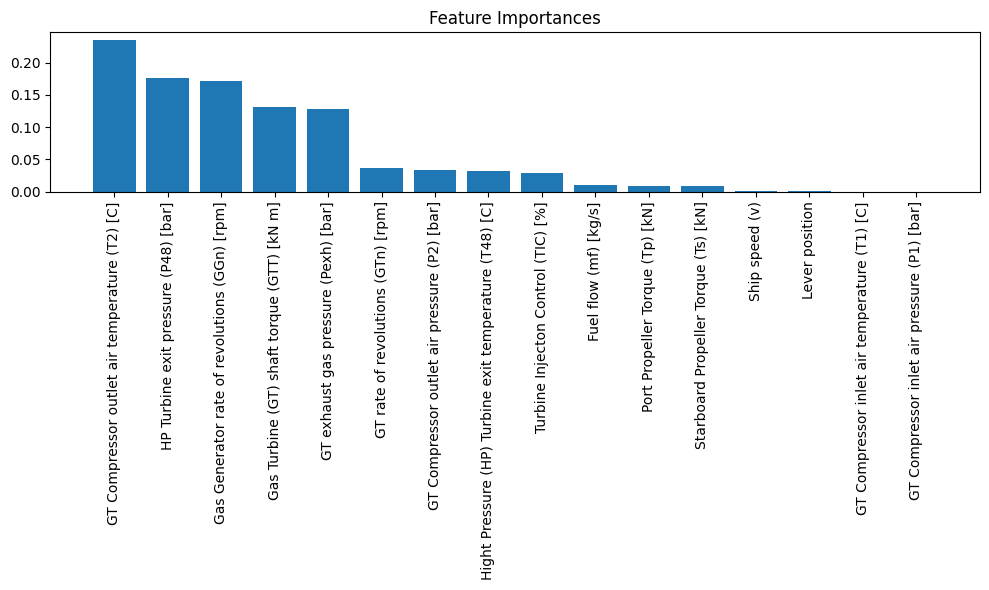

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()


In [ ]:
# Clean feature names (remove special characters and spaces)
clean_feature_names = [
    name.replace('[', '').replace(']', '').replace('(', '_').replace(')', '_').replace('%', 'percent').replace(' ', '_')
    for name in X_train.columns
]

# Apply cleaned names to both training and test sets
X_train.columns = clean_feature_names
X_test.columns = clean_feature_names


In [ ]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

xgb_model = MultiOutputRegressor(
    XGBRegressor(tree_method='hist', random_state=42)
)
xgb_model.fit(X_train, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

xgb_y_pred = xgb_model.predict(X_test)

mse_compressor = mean_squared_error(y_test.iloc[:, 0], xgb_y_pred[:, 0])
r2_compressor = r2_score(y_test.iloc[:, 0], xgb_y_pred[:, 0])

mse_turbine = mean_squared_error(y_test.iloc[:, 1], xgb_y_pred[:, 1])
r2_turbine = r2_score(y_test.iloc[:, 1], xgb_y_pred[:, 1])

print("Compressor - MSE:", mse_compressor, "R2:", r2_compressor)
print("Turbine    - MSE:", mse_turbine, "R2:", r2_turbine)


Compressor - MSE: 1.4288154377732631e-06 R2: 0.9933534878092268
Turbine    - MSE: 7.546076428420843e-07 R2: 0.9867574854909812


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Decision Tree model
model_dt = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
model_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = model_dt.predict(X_test)

mse_compressor_dt = mean_squared_error(y_test.iloc[:, 0], y_pred_dt[:, 0])
r2_compressor_dt = r2_score(y_test.iloc[:, 0], y_pred_dt[:, 0])
mse_turbine_dt = mean_squared_error(y_test.iloc[:, 1], y_pred_dt[:, 1])
r2_turbine_dt = r2_score(y_test.iloc[:, 1], y_pred_dt[:, 1])

print("Decision Tree - Compressor: MSE =", mse_compressor_dt, "R2 =", r2_compressor_dt)
print("Decision Tree - Turbine:    MSE =", mse_turbine_dt, "R2 =", r2_turbine_dt)


Decision Tree - Compressor: MSE = 2.594051110180147e-06 R2 = 0.9879330864774455
Decision Tree - Turbine:    MSE = 8.701298701298719e-07 R2 = 0.9847302004701046


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN model
model_knn = MultiOutputRegressor(KNeighborsRegressor())
model_knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = model_knn.predict(X_test)

mse_compressor_knn = mean_squared_error(y_test.iloc[:, 0], y_pred_knn[:, 0])
r2_compressor_knn = r2_score(y_test.iloc[:, 0], y_pred_knn[:, 0])
mse_turbine_knn = mean_squared_error(y_test.iloc[:, 1], y_pred_knn[:, 1])
r2_turbine_knn = r2_score(y_test.iloc[:, 1], y_pred_knn[:, 1])

print("KNN - Compressor: MSE =", mse_compressor_knn, "R2 =", r2_compressor_knn)
print("KNN - Turbine:    MSE =", mse_turbine_knn, "R2 =", r2_turbine_knn)


KNN - Compressor: MSE = 1.285664013405951e-05 R2 = 0.940193944491122
KNN - Turbine:    MSE = 6.4839715123586305e-06 R2 = 0.8862136003485424


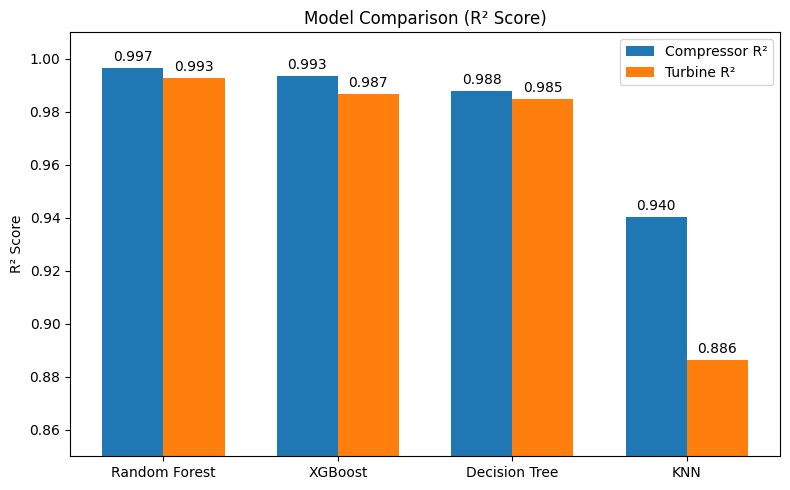

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# R2 scores from your results
models = ['Random Forest', 'XGBoost', 'Decision Tree', 'KNN']

r2_compressor = [0.9965, 0.9934, 0.9879, 0.9402]  # fill with your actual values
r2_turbine    = [0.9926, 0.9868, 0.9847, 0.8862]  # fill with your actual values

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, r2_compressor, width, label='Compressor R²')
rects2 = ax.bar(x + width/2, r2_turbine, width, label='Turbine R²')

ax.set_ylabel('R² Score')
ax.set_title('Model Comparison (R² Score)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.85, 1.01)
ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('r2_score_comparison.png')
plt.show()


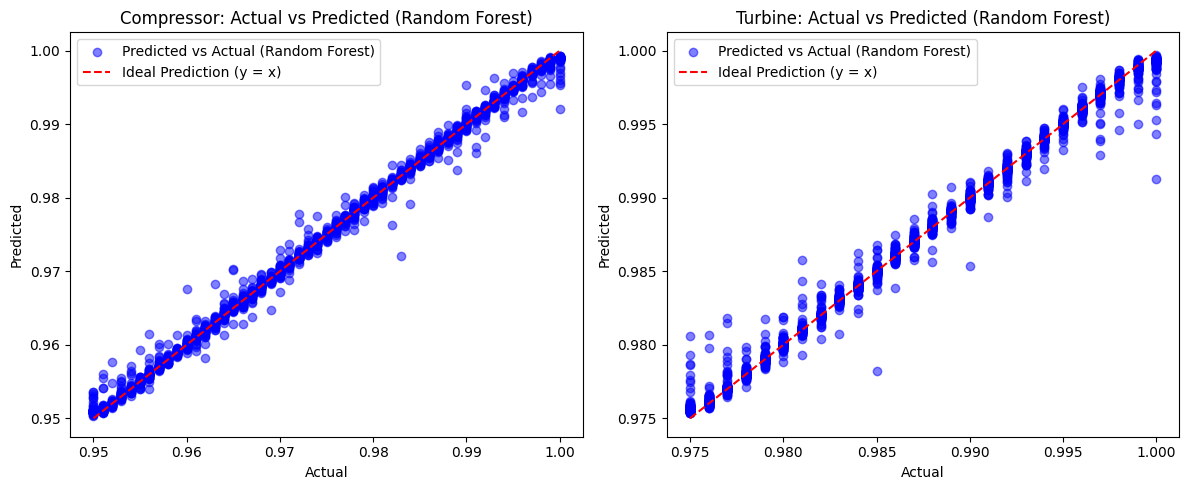

In [ ]:
plt.figure(figsize=(12, 5))

# Compressor Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0], alpha=0.5, label='Predicted vs Actual (Random Forest)', color='blue')
plt.plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], 'r--', label='Ideal Prediction (y = x)')
plt.title('Compressor: Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Turbine Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test.iloc[:, 1], y_pred[:, 1], alpha=0.5, label='Predicted vs Actual (Random Forest)', color='blue')
plt.plot([y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()],
         [y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], 'r--', label='Ideal Prediction (y = x)')
plt.title('Turbine: Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.savefig('actual_vs_predicted_rf.png')
plt.show()


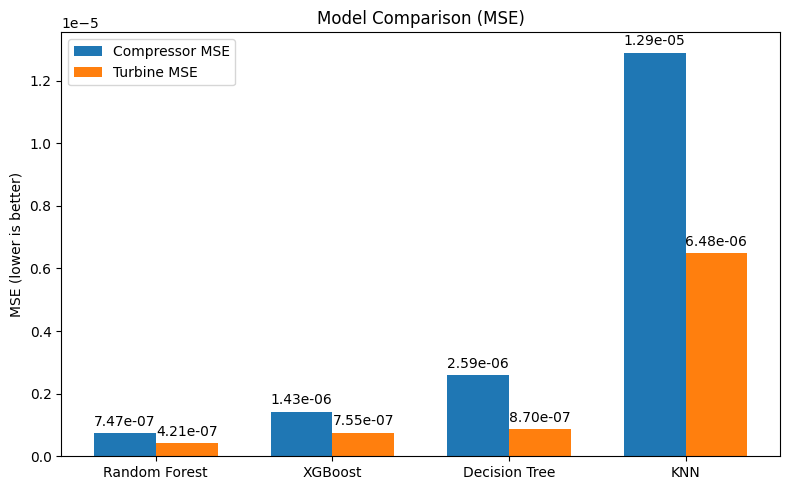

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# MSE values from your results
models = ['Random Forest', 'XGBoost', 'Decision Tree', 'KNN']
mse_compressor = [7.47e-07, 1.43e-06, 2.59e-06, 1.29e-05]
mse_turbine    = [4.21e-07, 7.55e-07, 8.70e-07, 6.48e-06]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, mse_compressor, width, label='Compressor MSE')
rects2 = ax.bar(x + width/2, mse_turbine, width, label='Turbine MSE')

ax.set_ylabel('MSE (lower is better)')
ax.set_title('Model Comparison (MSE)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2e}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('mse_comparison.png')
plt.show()
plt.close()
